
Universidade Estadual Paulista - UNESP

Programa de Pós-Graduação em Ciência da Computação

**Processamento de Imagens Digitais**

Professor Leandro Alves Neves

Alunos: 
* Giovanna Carreira Marinho;
* Guilherme Francisco de Andrade Campos;
* Julia Rodrigues Gubolin;
* Thales Ricardo de Souza Lopes.

**Aula 04 - Modelos de ruídos**

**Exercício 5**: Considere as imagens obtidas no exercício 3 e aplique a correção gama com c=1 e γ(0.04; 0.4; 1; 2, 5; 10; e 25). Visualmente, esse tipo de realce permitiu melhorar a qualidade de cada imagem com ruído? Se houve algum resultado positivo, indique o valor de γ, o tipo de ruído e a imagem.

**Exercício 6**: Após aplicar a correção gama com c=1 e γ(0.04; 0.4; 1; 2, 5; 10; e 25) nas imagens com ruídos, calcule as métricas indicadas no exercício 4 e avalie se é possível comprovar quantitativamente as observações empíricas indicadas no exercício 5. Por fim, responda
se esse tipo de técnica (realce) é útil para corrigir as imagens com ruídos. Justifique sua resposta.

In [ ]:
import skimage.io, skimage.exposure, skimage.util
import sklearn.metrics
import matplotlib.pyplot as plt
import numpy as np
from random import seed
from random import randint
from random import random

# Criação das imagens 

Criação das imagens para os experimentos.
As imagens possuem dimensões 256x256 com 256 níveis de profundidade.
Para a composição das imagens são utilizados numpy arrays de duas dimensões, utilizando a biblioteca numpy.
Para plotar as imagens foi utilizada a biblioteca matplotlib.

In [ ]:
image_height = 256
image_width = 256
gray_levels = 256
depth_levels = gray_levels - 1

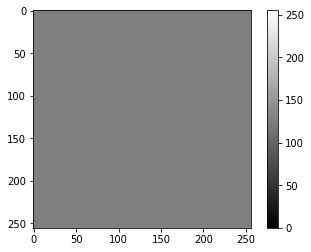

In [ ]:
image_a = np.zeros((image_height, image_width), dtype=np.uint8)

gray_shades = 2
image_a[:, :] = int(depth_levels / gray_shades)

plt.imshow(image_a, cmap='gray')
plt.clim(0, depth_levels)
plt.colorbar()
#plt.imsave('/content/image_a.png', image_a, vmin=0, vmax=depth_levels, cmap='gray')

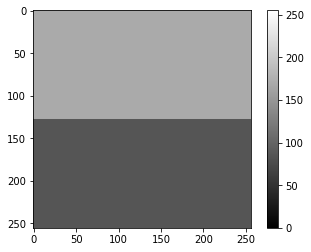

In [ ]:
image_b = np.zeros((image_height, image_width), dtype=np.uint8)

gray_shades = 3
image_b[:int(image_height/2) , :] = int(depth_levels / gray_shades) * 2
image_b[int(image_height/2):, :] = int(depth_levels / gray_shades) * 1

plt.imshow(image_b, cmap='gray')
plt.clim(0, depth_levels)
plt.colorbar()
#plt.imsave('/content/image_b.png', image_b, vmin=0, vmax=depth_levels, cmap='gray')

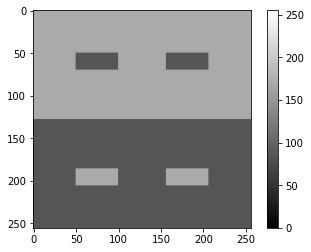

In [ ]:
image_c = np.zeros((image_height, image_width), dtype=np.uint8)

gray_shades = 3
image_c[:int(image_height/2) , :] = int(depth_levels / gray_shades) * 2
image_c[int(image_height/2):, :] = int(depth_levels / gray_shades) * 1

image_c[50:70, 50:100] = int(depth_levels / gray_shades) * 1
image_c[50:70, image_width-100:image_width-50] = int(depth_levels / gray_shades) * 1

image_c[image_height-70:image_height-50 , 50:100] = int(depth_levels / gray_shades) * 2
image_c[image_height-70:image_height-50 , image_width-100:image_width-50] = int(depth_levels / gray_shades) * 2

plt.imshow(image_c, cmap='gray')
plt.clim(0, depth_levels)
plt.colorbar()
#plt.imsave('/content/image_c.png', image_c, vmin=0, vmax=depth_levels, cmap='gray')

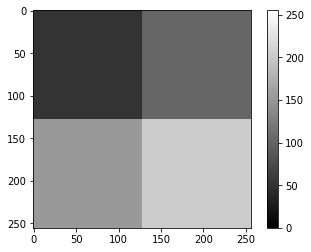

In [ ]:
image_d = np.zeros((image_height, image_width), dtype=np.uint8)

gray_shades = 5
image_d[:int(image_height/2) , :int(image_width/2)] = int(depth_levels / gray_shades) * 1
image_d[:int(image_height/2), int(image_width/2):] = int(depth_levels / gray_shades) * 2
image_d[int(image_height/2): , :int(image_width/2)] = int(depth_levels / gray_shades) * 3
image_d[int(image_height/2):, int(image_width/2):] = int(depth_levels / gray_shades) * 4

plt.imshow(image_d, cmap='gray')
plt.clim(0, depth_levels)
plt.colorbar()
#plt.imsave('/content/image_d.png', image_d, vmin=0, vmax=depth_levels, cmap='gray')

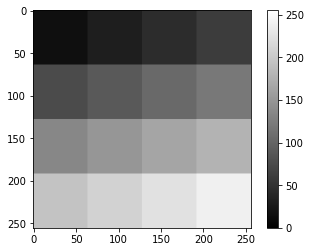

In [ ]:
image_e = np.zeros((image_height, image_width), dtype=np.uint8)

gray_shades = 17
image_e[:int(image_height/4) , :int(image_width/4)] = int(depth_levels / gray_shades) * 1
image_e[:int(image_height/4) , int(image_width/4):int(image_width/4)*2] = int(depth_levels / gray_shades) * 2
image_e[:int(image_height/4) , int(image_width/4)*2:int(image_width/4)*3] = int(depth_levels / gray_shades) * 3
image_e[:int(image_height/4) , int(image_width/4)*3:] = int(depth_levels / gray_shades) * 4

image_e[int(image_height/4):int(image_height/4)*2 , :int(image_width/4)] = int(depth_levels / gray_shades) * 5
image_e[int(image_height/4):int(image_height/4)*2 , int(image_width/4):int(image_width/4)*2] = int(depth_levels / gray_shades) * 6
image_e[int(image_height/4):int(image_height/4)*2 , int(image_width/4)*2:int(image_width/4)*3] = int(depth_levels / gray_shades) * 7
image_e[int(image_height/4):int(image_height/4)*2 , int(image_width/4)*3:] = int(depth_levels / gray_shades) * 8

image_e[int(image_height/4)*2:int(image_height/4)*3 , :int(image_width/4)] = int(depth_levels / gray_shades) * 9
image_e[int(image_height/4)*2:int(image_height/4)*3 , int(image_width/4):int(image_width/4)*2] = int(depth_levels / gray_shades) * 10
image_e[int(image_height/4)*2:int(image_height/4)*3 , int(image_width/4)*2:int(image_width/4)*3] = int(depth_levels / gray_shades) * 11
image_e[int(image_height/4)*2:int(image_height/4)*3 , int(image_width/4)*3:] = int(depth_levels / gray_shades) * 12

image_e[int(image_height/4)*3: , :int(image_width/4)] = int(depth_levels / gray_shades) * 13
image_e[int(image_height/4)*3: , int(image_width/4):int(image_width/4)*2] = int(depth_levels / gray_shades) * 14
image_e[int(image_height/4)*3: , int(image_width/4)*2:int(image_width/4)*3] = int(depth_levels / gray_shades) * 15
image_e[int(image_height/4)*3: , int(image_width/4)*3:] = int(depth_levels / gray_shades) * 16

plt.imshow(image_e, cmap='gray')
plt.clim(0, depth_levels)
plt.colorbar()
#plt.imsave('/content/image_e.png', image_e, vmin=0, vmax=depth_levels, cmap='gray')

# Geração do histograma de uma imagem

Geração das funções para a criação de histogramas dada uma imagem de entrada.

In [ ]:
def get_histogram(image, gray_levels=256):
  histogram = np.zeros(gray_levels) #criando um vetor com todos os elementos zerados

  N, M = image.shape #altura (linha), largura (coluna)

  for i in range(N):
    for j in range(M):
      pixel_intensity = image[i, j]
      histogram[int(pixel_intensity)] += 1
  
  return histogram

In [ ]:
def plot_histogram(image, histogram=None, cdf=False):
  if histogram is None: #se nao enviar o histograma, gera pela biblioteca
    image_histogram, bin_centers = skimage.exposure.histogram(image)
    plt.plot(bin_centers, image_histogram, 'r')
  else:
    image_histogram = get_histogram(image)
    x = np.linspace(0, 256, 256)
    plt.plot(x, image_histogram, 'b')
  plt.xlim([0, 255])

  if cdf: #cumulative distribution function (cdf)
    image_cdf, bins_cdf = skimage.exposure.cumulative_distribution(image)
    plt.twinx().plot(bins_cdf, image_cdf, 'black')

In [ ]:
image_e_histogram = get_histogram(image_e)

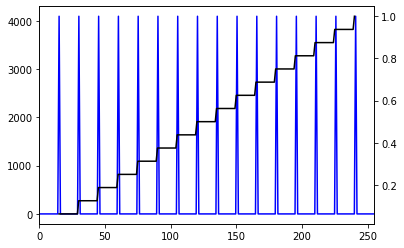

In [ ]:
plot_histogram(image_e, image_e_histogram, cdf=True)

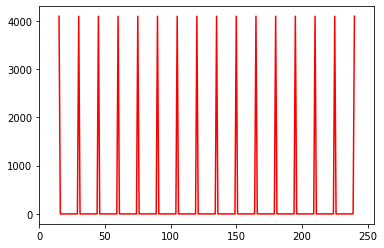

In [ ]:
plot_histogram(image_e)

# Definição dos ruídos aditivos

Criação das funções para a adição de ruidos dada uma imagem de entrada. Também foi utilizado aplicação de ruídos da biblioteca skimage.

In [ ]:
def apply_salt_and_pepper_noise(image, probability, from_package=False):
  if from_package: #ruido aplicado pelo pacote
    noised_image = skimage.util.random_noise(image, mode='s&p', amount=probability)*255
    return noised_image

  compl_probability = 1 - probability
  noised_image = np.zeros(image.shape, dtype=np.uint8)

  N, M = image.shape
  
  for i in range(N):
    for j in range(M):
      pixel_probability = np.random.random()

      if pixel_probability < probability:
        noised_image[i][j] = 0
      elif pixel_probability > compl_probability:
        noised_image[i][j] = 255
      else:
        noised_image[i][j] = image[i][j]

  return noised_image

In [ ]:
def apply_uniform_noise(image, a, b):
  M, N = image.shape
  prob = 1/(b-a) * (M*N)
  seed(random())
  noise = np.zeros((M, N))
  noised_image = np.zeros((M, N))

  for i in range(a, b):
    for j in range(1, int(prob)):
      x = randint(0, M-1)
      y = randint(0, N-1)
      noise[x][y] = i
  
  for m in range(M):
    for n in range(N):
      if noise[m][n] != 0:
        noised_image[m][n] = noise[m][n]
      else:
        noised_image[m][n] = image[m][n]

  return noised_image

In [ ]:
def apply_gaussian_noise(image, mean, var, from_package=False):
  if from_package:
    noised_image = skimage.util.random_noise(image, mode='gaussian', mean=mean, var=var)*255
    return noised_image
  
  standard_deviation = var ** 0.5
  gaussian_noise = np.random.normal(mean, standard_deviation, image.shape)*255
  noised_image = image + gaussian_noise

  return noised_image

In [ ]:
def apply_gama_noise(image, shape, scale):
  gama_noise = np.random.gamma(shape=shape, scale=scale, size=image.shape)
  noised_image = image + gama_noise
  return noised_image

In [ ]:
def apply_poisson_noise(image):
  noised_image = skimage.util.random_noise(image, mode='poisson')*255
  return noised_image

# Definição da correção gama

In [ ]:
def gamma_correction(f, gamma = 1, c = 1):
  return (c*((f/255)**gamma))*255

# Definição das métricas de avaliação




In [ ]:
def maximum_error(f, g):
  return np.max(np.absolute(f - g))

In [ ]:
def mean_absolute_error(f, g):
  absolute_sub = np.absolute(f - g)
  N, M = f.shape
  sum = 0

  for i in range(N):
    for j in range(M):
      sum += absolute_sub[i, j]
  
  return (1/(N*M))*sum

In [ ]:
def mean_square_error(f, g):
  N, M = f.shape
  sum = 0

  for i in range(N):
    for j in range(M):
      power_sub = (f[i][j] - g[i][j])**2
      sum += power_sub

  return sum/(N*M)

In [ ]:
def root_mean_square_error(f, g):
  N, M = f.shape
  sum = 0

  for i in range(N):
    for j in range(M):
      power_sub = (f[i, j] - g[i, j])**2
      sum += power_sub
  
  return np.sqrt(sum/(N*M))

In [ ]:
def normalized_mean_square_error(f, g):
  N, M = f.shape
  sum_fg = 0
  sum_f = 0

  for i in range(N):
    for j in range(M):
      sum_fg = (f[i][j] - g[i][j])**2
      sum_f = f[i][j]**2

  return sum_fg/sum_f

In [ ]:
def peak_signal_to_noise_ratio(f, g):
  rmse = root_mean_square_error(f, g)

  return 20*(np.log10(255/rmse))

In [ ]:
def covariance(f, g):
  uf = np.mean(f)
  ug = np.mean(g)
  sum = 0
  N, M = f.shape

  for i in range(N):
    for j in range(M):
      sum += ((f[i, j]-uf)*(g[i, j]-ug))

  return sum/(M*N)

In [ ]:
def jaccard_index(f, g):
  N, M = f.shape
  sum = 0

  for i in range(N):
    for j in range(M):
      if f[i, j] == g[i, j]:
        sum += 1
  
  return sum/(M*N)

# Aplicação dos ruídos e correção gama

Será utilizada a correção gama com valores de c=1 e γ(0.04;
0.4; 1; 2, 5; 10; e 25) nas imagens ruídosas após a aplicação dos ruídos sal e
pimenta, uniforme, gaussiano, gama e poisson.

Erro máximo: 173.15563650761192
Erro médio absoluto: 78.74842192608985
Erro médio quadrático: 6941.475612609622
Raiz do erro médio quadrático: 83.31551843810145
Erro médio quadrático normalizado: 0.04586016862838636
Relação sinal-ruído de pico: 9.71628558670511
Covariância: 1816.5608312100157
Coeficiênte de Jaccard: 0.0


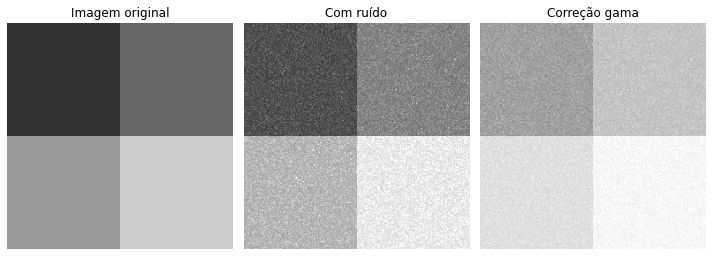

In [ ]:
img = image_d
noised_img = apply_gama_noise(img, 3, 10)
gama_img = gamma_correction(noised_img, 0.4, 1)

fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(10, 10))

ax0.imshow(img, cmap='gray', vmin=0, vmax=255)
ax0.set_title("Imagem original")
ax0.axis('off')
ax1.imshow(noised_img, cmap='gray', vmin=0, vmax=255)
ax1.set_title("Com ruído")
ax1.axis('off')
ax2.imshow(gama_img, cmap='gray', vmin=0, vmax=255)
ax2.set_title("Correção gama")
ax2.axis('off')

fig.tight_layout()

print(f"Erro máximo: {maximum_error(img, gama_img)}")
print(f"Erro médio absoluto: {mean_absolute_error(img, gama_img)}")
print(f"Erro médio quadrático: {mean_square_error(img, gama_img)}")
print(f"Raiz do erro médio quadrático: {root_mean_square_error(img, gama_img)}")
print(f"Erro médio quadrático normalizado: {normalized_mean_square_error(img, gama_img)}")
print(f"Relação sinal-ruído de pico: {peak_signal_to_noise_ratio(img, gama_img)}")
print(f"Covariância: {covariance(img, gama_img)}")
print(f"Coeficiênte de Jaccard: {jaccard_index(img, gama_img)}")

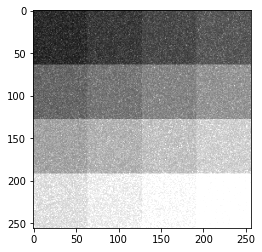

In [ ]:
img = image_e
plt.imshow(apply_gama_noise(img, 3, 10), cmap="gray", vmin=0, vmax=255)

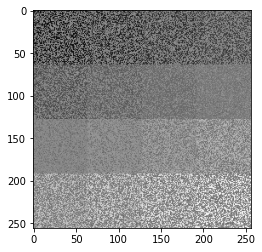

In [ ]:
img = image_e
img_noised = apply_uniform_noise(img, 100, 150)
plt.imshow(apply_uniform_noise(img, 100, 150), cmap="gray", vmin=0, vmax=255)

In [ ]:
covariance(img_noised, img_noised)

1876.8591616681128

As imagens ruídosas foram sujeitas a correção gama, mas nenhuma se mostrou visivelmente com menos ruído. A correção gama é uma técnica de realce de contraste, mas ao utilizar ela para tratamento de ruídos, ela não se mostra eficiente, visto que, ao realçar a imagem como um todo ela também realça o ruído. De maneira complementar, é possível observar as métricas de avaliação, onde nenhuma delas mostrou um baixo erro quando comparada a imagem original com a imagem ruidosa ao aplicar a correção gama.

# Equalização de Histograma

In [ ]:
def get_acc_histogram(histogram):
  L = histogram.size
  acc_histogram = histogram.copy()

  for i in range(1, L):
    acc_histogram[i] += acc_histogram[i - 1]
  
  return acc_histogram

In [ ]:
def equalize_histogram(image, gray_levels=256):
  equalized_image = np.zeros(image.shape)
  histogram = get_histogram(image)
  acc_histogram = get_acc_histogram(histogram)
  N, M = image.shape
  factor = (gray_levels - 1) / (N * M)

  for i in range(N):
    for j in range(M):
      equalized_image[i, j] = factor * acc_histogram[image[i,j]]

  return equalized_image

In [ ]:
moon_image = skimage.io.imread('/content/sample_data/frutas.bmp', as_gray=True)

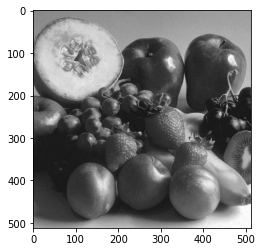

In [ ]:
plt.imshow(moon_image, cmap='gray')

In [ ]:
get_histogram(moon_image)

array([0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 2.000e+00,
       4.000e+00, 5.000e+00, 3.000e+00, 4.000e+00, 5.000e+00, 1.000e+01,
       1.100e+01, 1.000e+01, 2.600e+01, 3.400e+01, 3.700e+01, 3.700e+01,
       7.200e+01, 8.300e+01, 1.440e+02, 1.730e+02, 2.600e+02, 3.260e+02,
       5.280e+02, 1.015e+03, 2.846e+03, 6.788e+03, 5.695e+03, 3.032e+03,
       2.436e+03, 2.044e+03, 1.791e+03, 1.629e+03, 1.596e+03, 1.588e+03,
       1.718e+03, 1.867e+03, 2.008e+03, 2.166e+03, 2.344e+03, 2.554e+03,
       2.643e+03, 2.740e+03, 2.764e+03, 2.787e+03, 2.760e+03, 2.956e+03,
       3.245e+03, 3.262e+03, 3.262e+03, 3.179e+03, 2.968e+03, 2.568e+03,
       2.372e+03, 2.202e+03, 2.139e+03, 2.132e+03, 1.937e+03, 1.917e+03,
       1.910e+03, 1.745e+03, 1.648e+03, 1.583e+03, 1.553e+03, 1.389e+03,
       1.354e+03, 1.291e+03, 1.286e+03, 1.227e+03, 1.159e+03, 1.190e+03,
       1.244e+03, 1.120e+03, 1.157e+03, 1.117e+03, 1.111e+03, 1.106e+03,
       1.094e+03, 1.050e+03, 1.106e+03, 1.080e+03, 

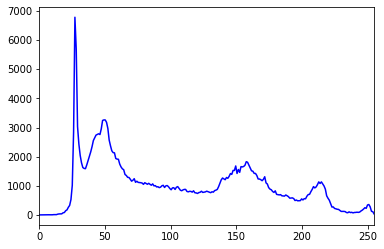

In [ ]:
plot_histogram(moon_image, get_histogram(moon_image))

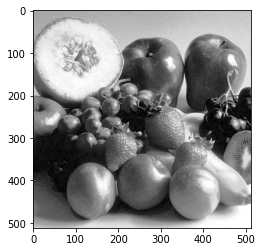

In [ ]:
moon_image_equalized = equalize_histogram(moon_image)
plt.imshow(moon_image_equalized, cmap='gray')

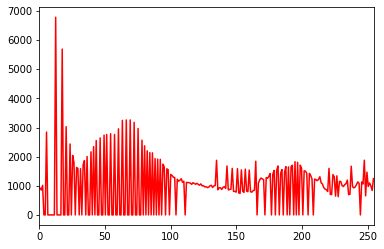

In [ ]:
plot_histogram(moon_image_equalized)

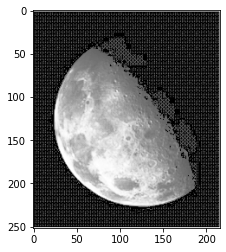

In [ ]:
moon_image_equalized_from_package = skimage.exposure.equalize_hist(moon_image)*255
plt.imshow(moon_image_equalized_from_package, cmap='gray')

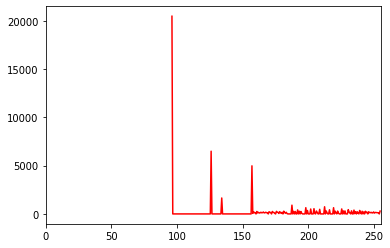

In [ ]:
plot_histogram(moon_image_equalized_from_package)